# Analise e Previsão de Acidentes de Transito Fatais em Rodovias Federais Brasileiras

Rayron Ferreira

05/03/2025

### Motivação

- impacto economico
- impacto social
- quanto custa por ano os acidentes ?
- qual o impacto com acidentes fatais ?
- reduzir o numero de acidentes de transito e esses impactos
- mitigar/evitar condicoes nas estradas que causam acidentes fatais
- previsao de acidente e gravidade do acidente
- podemos identificar os padroes de como os acidentes fatais ocorrem e os principais fatores?
- alocar melhor os recursos financeiros e humanos nas rodovias federais buscando evitar acidentes fatais

### Objetivos


### Analise

### Palavras-chave

### Sobre o Dataset

### Agradecimentos e Colaborações  

### Referencias

## Visualização e pre-processamento dos dados

In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import seaborn as sns
import os
from scipy.stats import boxcox
from pymongo import MongoClient
import altair as alt

### Classificação das Variáveis

**Atributos de Identificação**
* **id**: Identificador do acidente.
* **pesid**: Identificador da pessoa envolvida.
* **id_veiculo**: Identificador do veículo envolvido.

**Atributos de Período do Dia**
* **data_inversa**: Data da ocorrência.
* **dia_semana**: Dia da semana da ocorrência.
* **horario**: Horário da ocorrência.
* **fase_dia**: Fase do dia no momento do acidente.

**Atributos de Endereço**
* **uf**: Unidade da Federação.
* **br**: Identificador da BR.
* **km**: Quilômetro do acidente.
* **municipio**: Nome do município.
* **latitude**: Latitude do local do acidente.
* **longitude**: Longitude do local do acidente.
* **regional**: Superintendência regional da PRF.
* **delegacia**: Delegacia da PRF.
* **uop**: Unidade operacional da PRF.

**Atributos de Tráfego**
* **sentido_via**: Sentido da via.
* **tipo_pista**: Tipo de pista.
* **tracado_via**: Descrição do traçado da via.
* **uso_solo**: Características do local do acidente (urbano/rural).

**Atributos Climáticos**
* **condição_meteorologica**: Condição meteorológica no momento do acidente.

**Atributos de Causa e Tipo de Acidente**
* **causa_principal**: Causa principal do acidente.
* **causa_acidente**: Causa presumível do acidente.
* **ordem_tipo_acidente**: Sequência de eventos no acidente.
* **tipo_acidente**: Tipo de acidente.
* **classificação_acidente**: Gravidade do acidente.

**Atributos de Veículo**
* **tipo_veiculo**: Tipo de veículo.
* **marca**: Marca do veículo.
* **ano_fabricacao_veiculo**: Ano de fabricação do veículo.

**Atributos de Pessoas Envolvidas**
* **tipo_envolvido**: Tipo de envolvido no acidente.
* **estado_fisico**: Condição física do envolvido.
* **idade**: Idade do envolvido.
* **sexo**: Sexo do envolvido.

**Atributos de Vítimas**
* **ilesos**: Identifica se o envolvido foi ileso.
* **feridos_leves**: Identifica se o envolvido foi ferido leve.
* **feridos_graves**: Identifica se o envolvido foi ferido grave.
* **mortos**: Identifica se o envolvido foi morto.


In [ ]:
# ler todos os datasets csv
folder_path = "data"
dfs = []

def detect_delimiter(file_path):
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        first_line = file.readline()
        if ',' in first_line and ';' not in first_line:
            return ','
        elif ';' in first_line and ',' not in first_line:
            return ';'
        else:
            raise ValueError("Delimitador não identificado no arquivo: " + file_path)

for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    if file_name.endswith('.csv'):
        try:
            delimiter = detect_delimiter(file_path)
            new_df = pd.read_csv(file_path, delimiter=delimiter, encoding='ISO-8859-1', low_memory=False)
            dfs.append(new_df)
        except Exception as e:
            print(f"Erro ao processar o arquivo {file_name}: {e}")

df = pd.concat(dfs, ignore_index=True)

In [ ]:
# salvar dataset combinado

df.to_csv("acidentes-2013-2024.csv", index=False)

In [2]:
client = MongoClient('mongodb://localhost:27017/')
db = client['data_science']
collection = db['prf']

documents = collection.find()  

df_prf = pd.DataFrame(documents)

df_prf.describe()

,id,pesid,br,idade,ilesos,feridos_leves,feridos_graves,mortos
count,1.465343e+06,1.465343e+06,1.465343e+06,1.465343e+06,977884.000000,977884.000000,977884.000000,977884.000000
mean,2.244228e+07,8.953000e+06,2.158292e+02,3.822269e+01,0.485240,0.378134,0.106942,0.029685
std,3.663765e+07,2.338065e+07,1.292773e+02,1.440534e+01,0.499782,0.484922,0.309040,0.169716
min,8.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.115890e+05,4.699465e+05,1.010000e+02,2.800000e+01,0.000000,0.000000,0.000000,0.000000
50%,4.238820e+05,9.488540e+05,1.630000e+02,3.700000e+01,0.000000,0.000000,0.000000,0.000000
75%,8.306626e+07,4.292100e+06,3.430000e+02,4.800000e+01,1.000000,1.000000,0.000000,0.000000
max,8.352988e+07,8.398808e+07,9.310000e+02,9.900000e+01,1.000000,1.000000,1.000000,1.000000


In [3]:
df_prf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465343 entries, 0 to 1465342
Data columns (total 40 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   _id                     1465343 non-null  object 
 1   id                      1465343 non-null  float64
 2   pesid                   1465343 non-null  int64  
 3   data_inversa            1465343 non-null  object 
 4   dia_semana              1465343 non-null  object 
 5   horario                 1465343 non-null  object 
 6   uf                      1465343 non-null  object 
 7   br                      1465343 non-null  int64  
 8   km                      1465343 non-null  object 
 9   municipio               1465343 non-null  object 
 10  causa_acidente          1465343 non-null  object 
 11  tipo_acidente           1465343 non-null  object 
 12  classificacao_acidente  1465343 non-null  object 
 13  fase_dia                1465343 non-null  object 
 14  se

In [4]:
# remover variáveis que nao serão utilizadas na analise, pois nao fornecem nenhuma descricao que auxilie na previsão de acidentes
# como o id do acidente gerado pelo dataset (id)
# id da pessoa (pesid)
# e também os dados de qual unidade da PRF que realizou o registro do acidente (regional, delegacia e uop)
# _id gerado pelo mongo

df_prf = df_prf.drop(['regional','delegacia','uop','id', 'pesid', '_id', 'nacionalidade', 'naturalidade'], axis=1)

In [5]:
df_prf = df_prf.dropna(subset=['ilesos', "feridos_leves", "feridos_graves", "mortos"])


In [6]:
for ileso in df_prf["ilesos"].unique():
    print(ileso)

1.0
0.0


In [7]:
for ferido_leve in df_prf["feridos_leves"].unique():
    print(ferido_leve)

0.0
1.0


In [8]:
for ferido_grave in df_prf["feridos_graves"].unique():
    print(ferido_grave)

0.0
1.0


In [9]:
for morto in df_prf["mortos"].unique():
    print(morto)

0.0
1.0


In [10]:
# definir gravidade do acidente
# **Atributos de Vítimas**
# * **ilesos**: Identifica se o envolvido foi ileso. nível 1
# * **feridos_leves**: Identifica se o envolvido foi ferido leve. nível 2
# * **feridos_graves**: Identifica se o envolvido foi ferido grave. nível 3
# * **mortos**: Identifica se o envolvido foi morto. nível 4

def calcular_gravidade(row):
    if row['ilesos'] == 1:
        return 1
    elif row['feridos_leves'] == 1:
        return 2
    elif row['feridos_graves'] == 1:
        return 3
    elif row['mortos'] == 1:
        return 4
    else:
        return 0
    
df_prf['gravidade'] = df_prf.apply(calcular_gravidade, axis=1)

df_prf = df_prf[df_prf['gravidade'] != 0]

In [11]:
for gravidade in df_prf["gravidade"].unique():
    print(gravidade)

1
2
4
3


<Axes: title={'center': 'Gravidade por tipo de veiculo'}, xlabel='tipo_veiculo'>

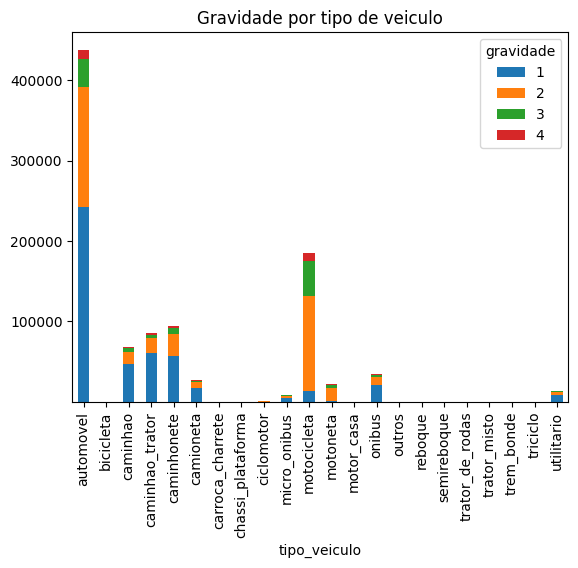

In [12]:
df_prf_gravidade = df_prf.groupby(['gravidade','tipo_veiculo']).size().reset_index().pivot(\
    columns='gravidade', index='tipo_veiculo', values=0)
df_prf_gravidade.plot(kind='bar', stacked=True, title='Gravidade por tipo de veiculo')

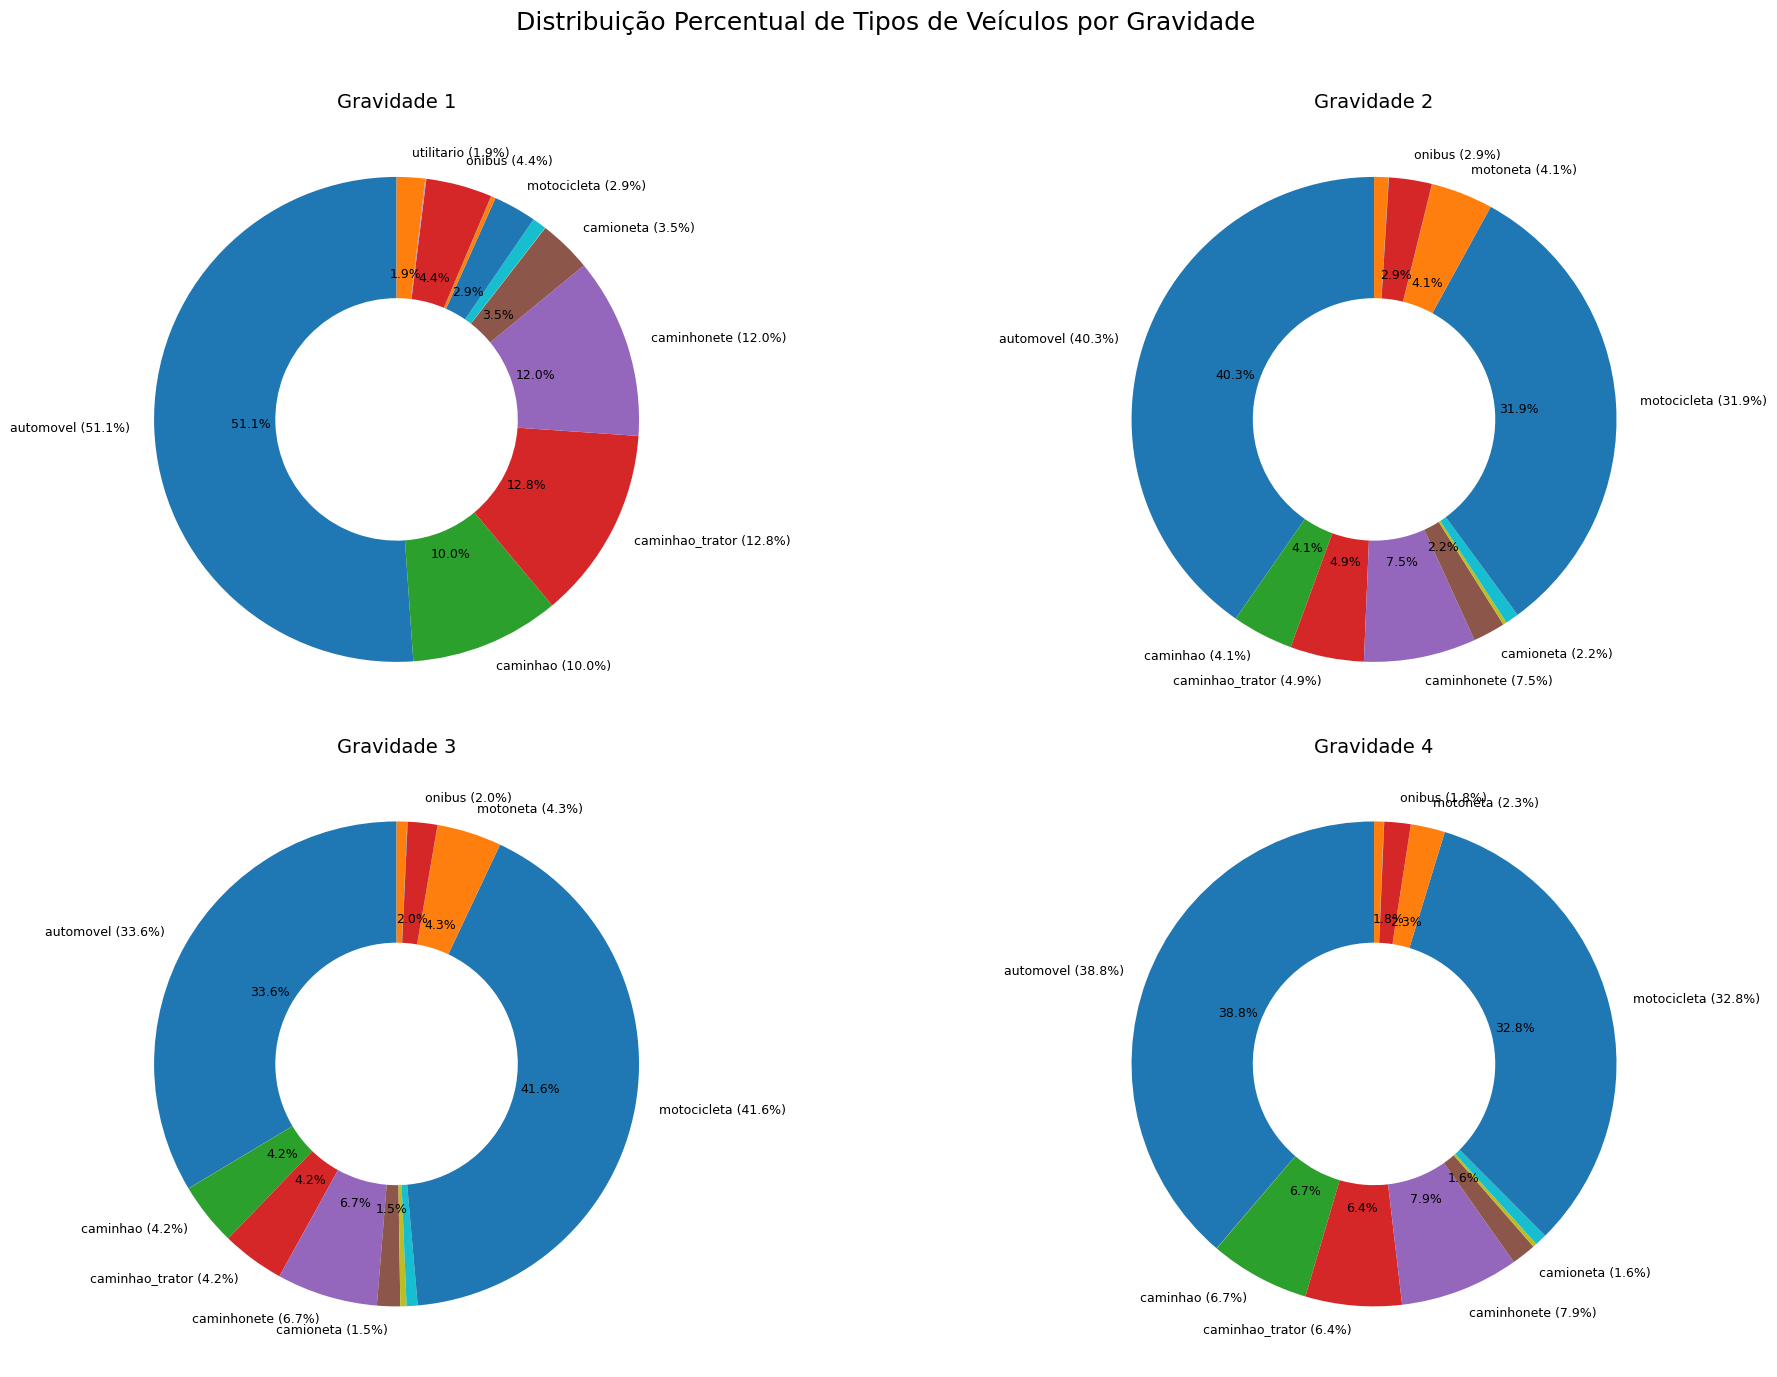

In [13]:
#df = pd.DataFrame(df_prf_gravidade).set_index('gravidade')

# Preenchendo valores ausentes com 0
df = df_prf_gravidade.fillna(0)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20, 14))  # Aumentar o tamanho da figura
axes = axes.ravel()

for idx, gravidade in enumerate(df.columns):
    # Calcular os percentuais
    total = df[gravidade].sum()
    percentuais = (df[gravidade] / total) * 100
    
    # Filtro para rótulos menores que 1%
    labels = [f'{label} ({pct:.1f}%)' if pct >= 1 else '' for label, pct in zip(df.index, percentuais)]
    
    # Plotar o gráfico de rosquinha
    wedges, texts, autotexts = axes[idx].pie(
        percentuais, 
        labels=labels, 
        autopct=lambda pct: f'{pct:.1f}%' if pct >= 1 else '',  # Apenas percentuais >= 1%
        startangle=90, 
        wedgeprops={'width': 0.5},
        textprops={'fontsize': 10},  # Ajustar fonte
    )
    
    # Ajustar aparência dos textos
    for text in texts:
        text.set_fontsize(9)
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_color('black')
    
    axes[idx].set_title(f'Gravidade {gravidade}', fontsize=14)

# Ajustar o layout geral
plt.suptitle('Distribuição Percentual de Tipos de Veículos por Gravidade', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [14]:
# checando variáveis categóricas

variaveis_categoricas = ['municipio', 'uf','causa_acidente','tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'uso_solo', 'estado_fisico', 'tipo_envolvido', 'marca', 'tipo_pista' ]

for variavel in variaveis_categoricas:
  print(variavel, df_prf[variavel].unique())

municipio ['vacaria' 'tijucas_do_sul' 'entre_rios' ... 'itarema' 'labrea'
 'dario_meira']
uf ['RS' 'PR' 'BA' 'RN' 'MG' 'MT' 'MA' 'SP' 'TO' 'PE' 'ES' 'AL' 'SC' 'PB'
 'RO' 'CE' 'SE' 'PA' 'RJ' 'GO' 'MS' 'PI' 'AM' 'DF' 'RR' 'AC' 'AP']
causa_acidente ['defeito_mecanico_no_veiculo' 'velocidade_incompativel'
 'condutor_dormindo' 'ingestao_de_alcool'
 'nao_guardar_distancia_de_seguranca' 'falta_de_atencao_a_conducao'
 'pista_escorregadia' 'falta_de_atencao_do_pedestre'
 'desobediencia_as_normas_de_transito_pelo_condutor'
 'fenomenos_da_natureza' 'animais_na_pista' 'defeito_na_via'
 'ultrapassagem_indevida' 'mal_subito'
 'carga_excessiva_e_ou_mal_acondicionada'
 'objeto_estatico_sobre_o_leito_carrocavel'
 'avarias_e_ou_desgaste_excessivo_no_pneu'
 'sinalizacao_da_via_insuficiente_ou_inadequada'
 'deficiencia_ou_nao_acionamento_do_sistema_de_iluminacao_sinalizacao_do_veiculo'
 'restricao_de_visibilidade' 'ingestao_de_substancias_psicoativas'
 'agressao_externa' 'desobediencia_as_normas_de_transi

In [15]:
# separar as regiões baseado no campo uf

regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def map_regiao(uf):
    for regiao, estados in regioes.items():
        if uf in estados:
            return regiao
    return 'Outros'

df_prf['regiao'] = df_prf['uf'].apply(map_regiao)

In [16]:
# os acidentes com relacao com o clima, matam mais pessoas (procurar alguma reportagem sobre o assunto que mostre essa estatistica anual),
# de acordo com .... 

for condicao in df_prf["condicao_metereologica"].unique():
    print(condicao)

ceu_claro
garoa_chuvisco
nublado
sol
chuva
nevoeiro_neblina
vento
granizo
neve


In [17]:
# definindo features booleanas para as condições climáticas

df_prf["Céu Claro"] = np.where(df_prf["condicao_metereologica"].str.contains("ceu_claro", case=False, na = False), True, False)
df_prf["Garoa/Chuvisco"] = np.where(df_prf["condicao_metereologica"].str.contains("garoa_chuvisco", case=False, na = False), True, False)
df_prf["Nublado"] = np.where(df_prf["condicao_metereologica"].str.contains("nublado", case=False, na = False), True, False)
df_prf["Sol"] = np.where(df_prf["condicao_metereologica"].str.contains("sol", case=False, na = False), True, False)
df_prf["Chuva"] = np.where(df_prf["condicao_metereologica"].str.contains("chuva", case=False, na = False), True, False)
df_prf["Nevoeiro/Neblina"] = np.where(df_prf["condicao_metereologica"].str.contains("nevoeiro_neblina", case=False, na = False), True, False)
df_prf["Vento"] = np.where(df_prf["condicao_metereologica"].str.contains("vento", case=False, na = False), True, False)
df_prf["Granizo"] = np.where(df_prf["condicao_metereologica"].str.contains("granizo", case=False, na = False), True, False)
df_prf["Neve"] = np.where(df_prf["condicao_metereologica"].str.contains("neve", case=False, na = False), True, False)

In [18]:
# removendo os campos false onde nao possui determinada condição e removendo o campo "condicao_metereologica"
# assim temos variáveis booleanas para as condições metereologicas

condicoes_climaticas = [
  "Céu Claro",
  "Garoa/Chuvisco",
  "Nublado",
  "Sol",
  "Chuva",
  "Nevoeiro/Neblina",
  "Vento",
  "Granizo",
  "Neve",
]

for condicao in condicoes_climaticas:
  df_prf.loc[df_prf["condicao_metereologica"].isnull(), condicao] = df_prf.loc[df_prf["condicao_metereologica"].isnull(), "condicao_metereologica"]
  df_prf[condicao] = df_prf[condicao].astype("bool")

df_prf.loc[:, ["condicao_metereologica"] + condicoes_climaticas]

df_prf = df_prf.drop(["condicao_metereologica"], axis=1)

C:\Users\Rayron\AppData\Local\Temp\ipykernel_19584\2214498015.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_prf.loc[df_prf["condicao_metereologica"].isnull(), condicao] = df_prf.loc[df_prf["condicao_metereologica"].isnull(), "condicao_metereologica"]
C:\Users\Rayron\AppData\Local\Temp\ipykernel_19584\2214498015.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_prf.loc[df_prf["condicao_metereologica"].isnull(), condicao] = df_prf.loc[df_prf["condicao_metereologica"].isnull(), "condicao_metereologica"]
C:\Users\Rayron\AppData\Local\Temp\ipykernel_19584\2214498015.py:17: FutureWarning: Setting an item of incompatible dtype is dep

In [19]:
# transformar campo horário para datetime

df_prf["data_horario"] = pd.to_datetime(df_prf["data_inversa"] + " " + df_prf["horario"], errors='coerce')


In [20]:
# definindo colunas de temporais

df_prf["Ano"] = df_prf["data_horario"].dt.year
df_prf["Mes"] = df_prf["data_horario"].dt.month
df_prf["Dia"] = df_prf["data_horario"].dt.day
df_prf["Hora"] = df_prf["data_horario"].dt.hour
df_prf["Minuto"] = df_prf["data_horario"].dt.minute
df_prf["Dia da Semana"] = df_prf["data_horario"].dt.weekday


In [21]:
colunas_temporais = ["horario", "Ano", "Mes", "Dia da Semana", "Dia", "Hora", "Minuto"]

df_prf[colunas_temporais].head(5)

,horario,Ano,Mes,Dia da Semana,Dia,Hora,Minuto
487459,01:45:00,2017,1,6,1,1,45
487460,01:00:00,2017,1,6,1,1,0
487461,04:40:00,2017,1,6,1,4,40
487462,07:40:00,2017,1,6,1,7,40
487463,10:35:00,2017,1,6,1,10,35


In [22]:
amostras_gravidade_4 = df_prf.loc[df_prf['gravidade'] == 4]

quantidade = amostras_gravidade_4.shape[0]

print(f"Quantidade de amostras com gravidade 4: {quantidade}")

Quantidade de amostras com gravidade 4: 29028


In [23]:
amostras_demais_gravidade = df_prf.loc[df_prf['gravidade'] != 4]

quantidade_demais = amostras_demais_gravidade.shape[0]

print(f"Quantidade demais amostras: {quantidade_demais}")

Quantidade demais amostras: 948856


In [24]:
df_gravidade4 = df_prf
df_gravidade4['gravidade4'] = 0
df_gravidade4.loc[df_gravidade4['gravidade'] == 4, 'gravidade4'] = 1
df_gravidade4 = df_gravidade4.drop(['gravidade'], axis = 1)

df_gravidade4.gravidade4.value_counts()

gravidade4
0    948856
1     29028
Name: count, dtype: int64

In [25]:
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)

In [26]:
df_prf_balanceado = resample(df_gravidade4, 'gravidade4', 50000)

print('Dataset balanceado:', df_prf_balanceado.gravidade4.value_counts())

Dataset balanceado: gravidade4
1    50000
0    50000
Name: count, dtype: int64


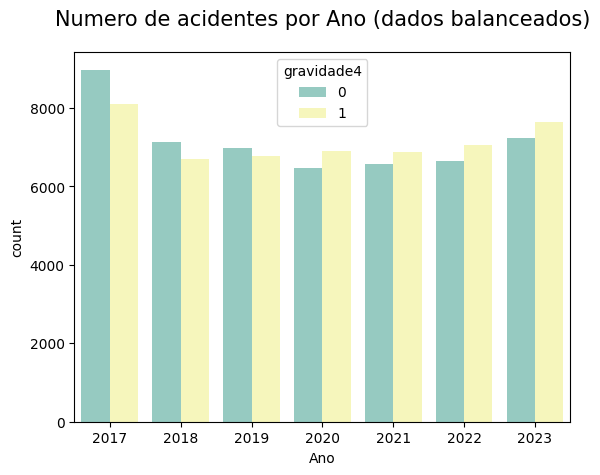

In [27]:
# Ano
df_prf_balanceado_ordenado = df_prf_balanceado.sort_values(by=['Ano', 'Mes', 'Dia da Semana'])
df_prf_balanceado_ordenado.Ano = df_prf_balanceado_ordenado.Ano.astype(str)

sns.countplot(x='Ano', hue='gravidade4', data=df_prf_balanceado_ordenado ,palette="Set3")
plt.title('Numero de acidentes por Ano (dados balanceados)', size=15, y=1.05)
plt.show()

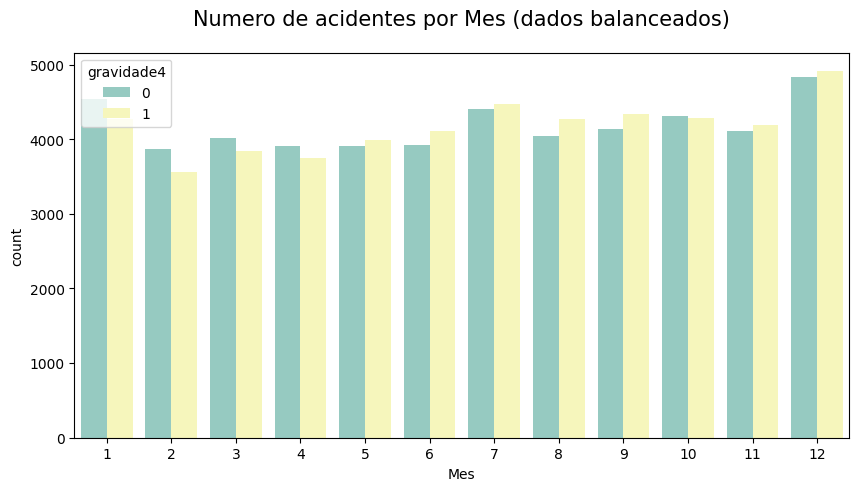

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Mes', hue='gravidade4', data=df_prf_balanceado_ordenado ,palette="Set3")
plt.title('Numero de acidentes por Mes (dados balanceados)', size=15, y=1.05)
plt.show()

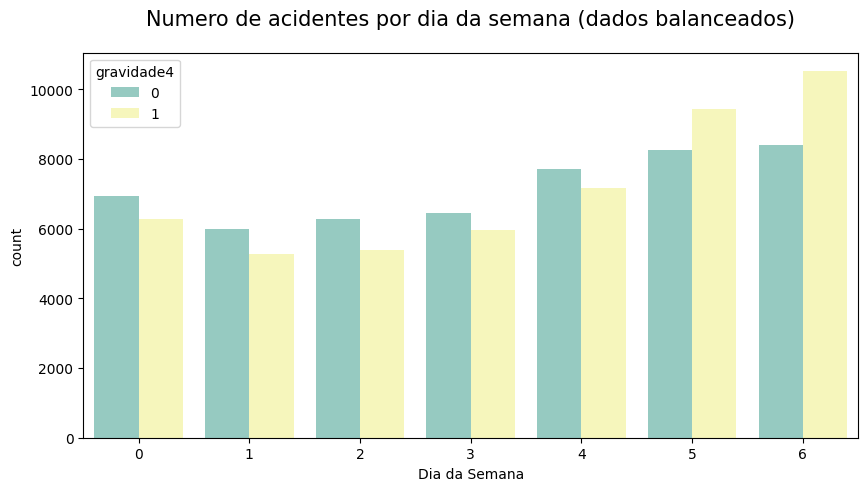

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Dia da Semana', hue='gravidade4', data=df_prf_balanceado_ordenado ,palette="Set3")
plt.title('Numero de acidentes por dia da semana (dados balanceados)', size=15, y=1.05)
plt.show()

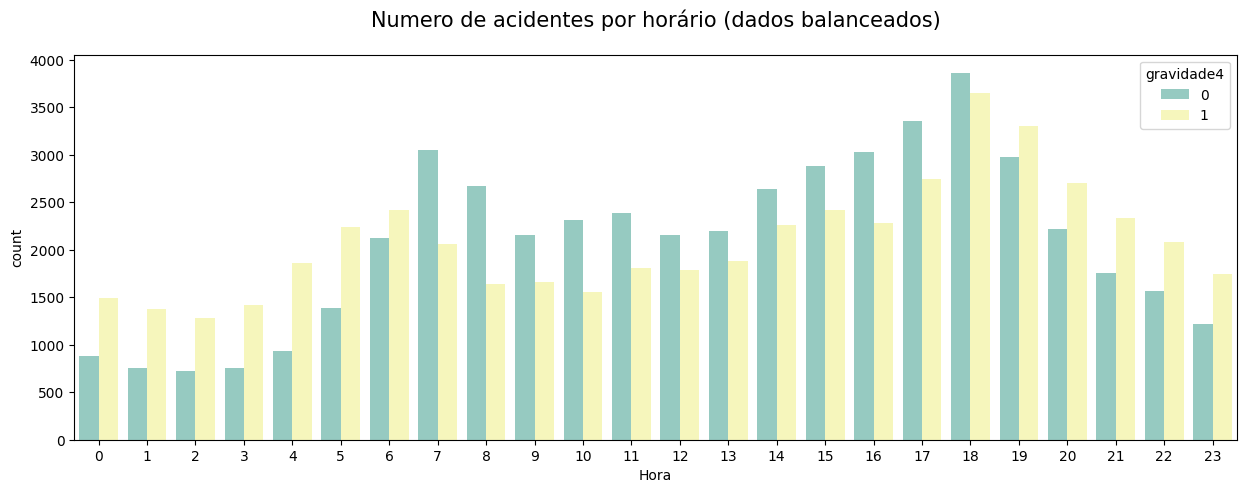

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hora', hue='gravidade4', data=df_prf_balanceado_ordenado ,palette="Set3")
plt.title('Numero de acidentes por horário (dados balanceados)', size=15, y=1.05)
plt.show()

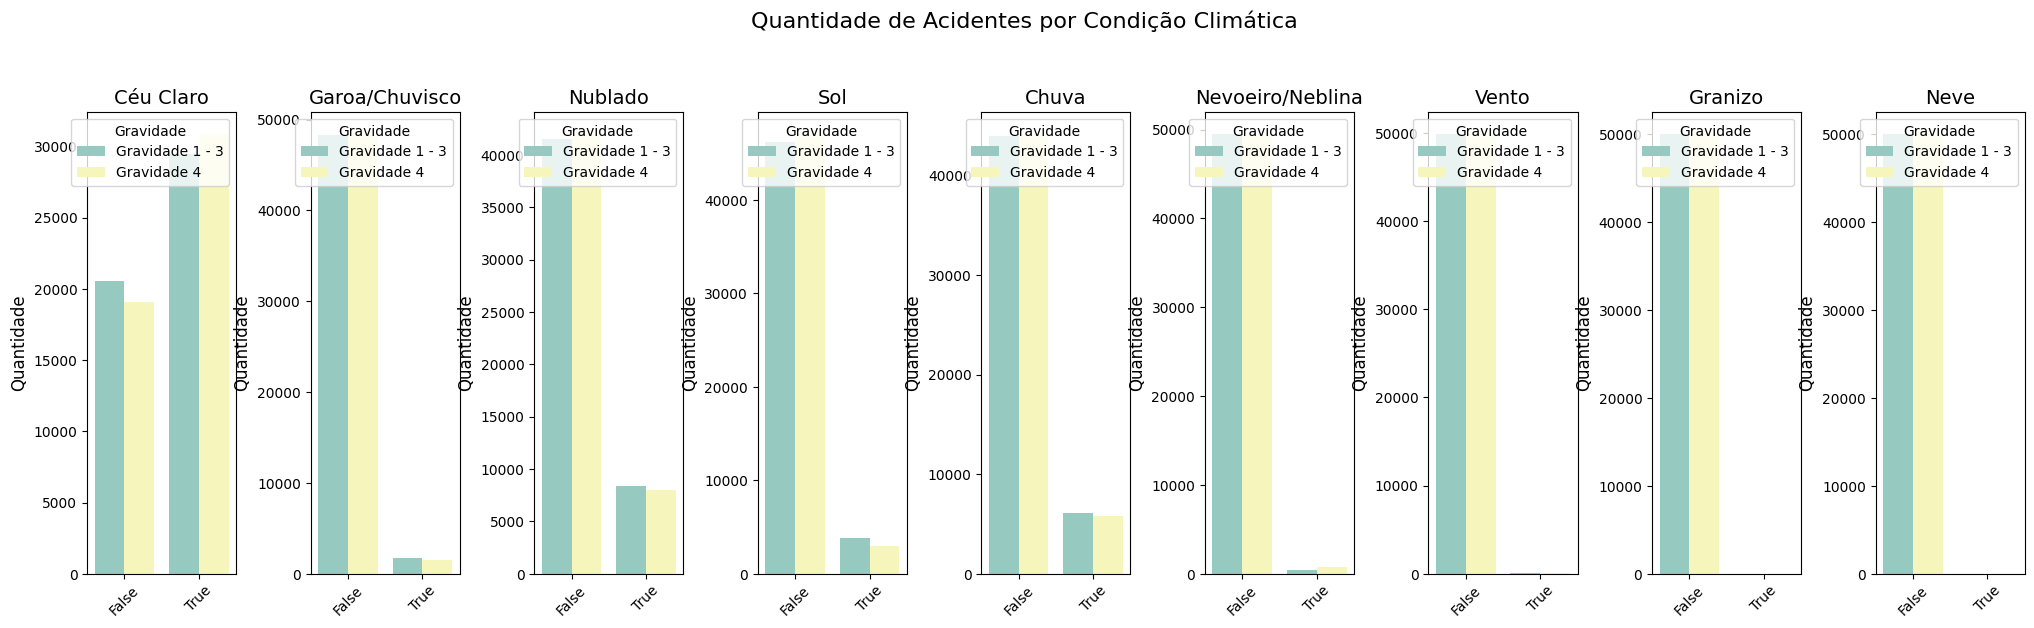

In [31]:
period_features = ['Céu Claro', 'Garoa/Chuvisco', 'Nublado', 'Sol', 'Chuva', 'Nevoeiro/Neblina', 'Vento', 'Granizo', 'Neve']

fig, axs = plt.subplots(nrows=1, ncols=len(period_features), figsize=(25, 6))
plt.subplots_adjust(wspace=0.5)

for i, feature in enumerate(period_features):
    sns.countplot(
        x=feature, 
        hue='gravidade4', 
        data=df_prf_balanceado, 
        palette="Set3", 
        ax=axs[i]
    )
    axs[i].set_title(feature, fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Quantidade', fontsize=12)
    axs[i].legend(title='Gravidade', labels=['Gravidade 1 - 3', 'Gravidade 4'], fontsize=10)
    axs[i].tick_params(axis='x', rotation=45, labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)

# Título geral do gráfico
fig.suptitle('Quantidade de Acidentes por Condição Climática', fontsize=16, y=1.05)

# Exibir o gráfico
plt.show()

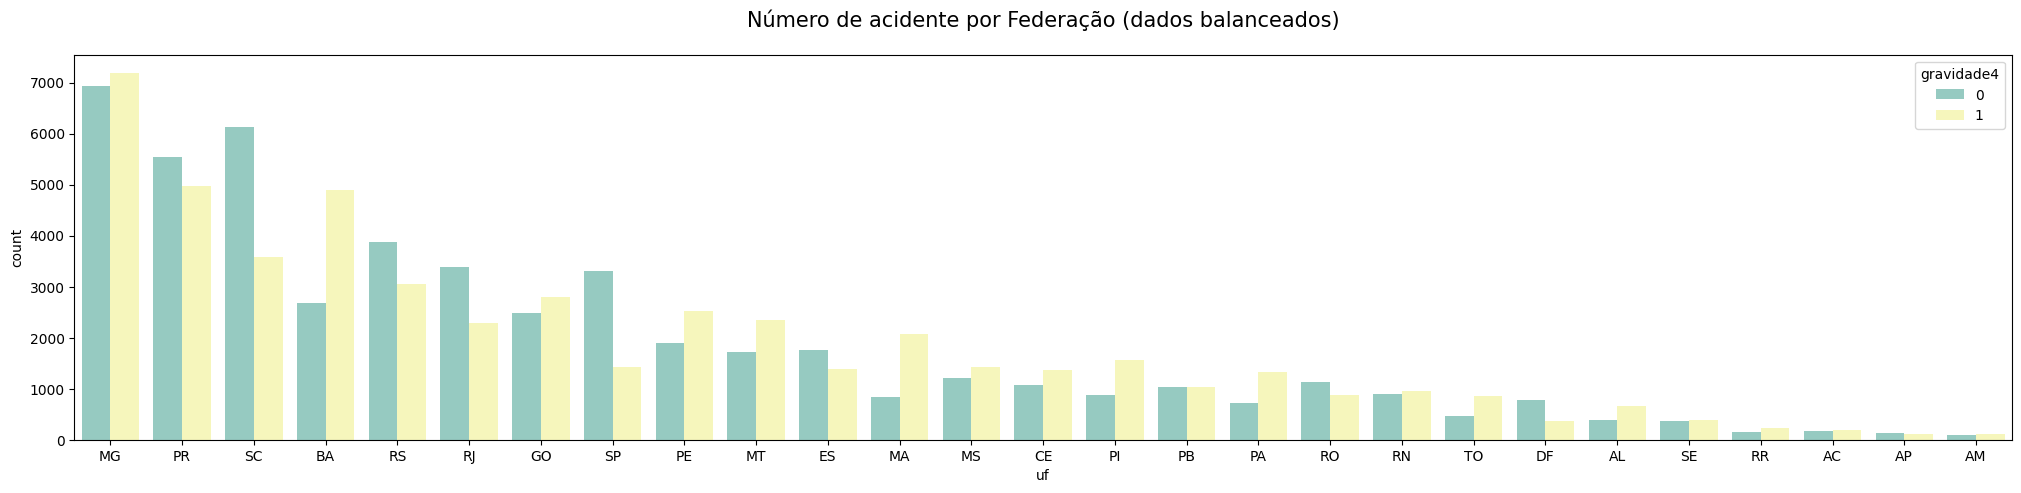

In [32]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='uf', hue='gravidade4', 
                      data=df_prf_balanceado_ordenado ,palette="Set3", order=df_prf_balanceado_ordenado['uf'].value_counts().index)
plt.title("Número de acidente por Federação (dados balanceados)", size=15, y=1.05)
plt.show()

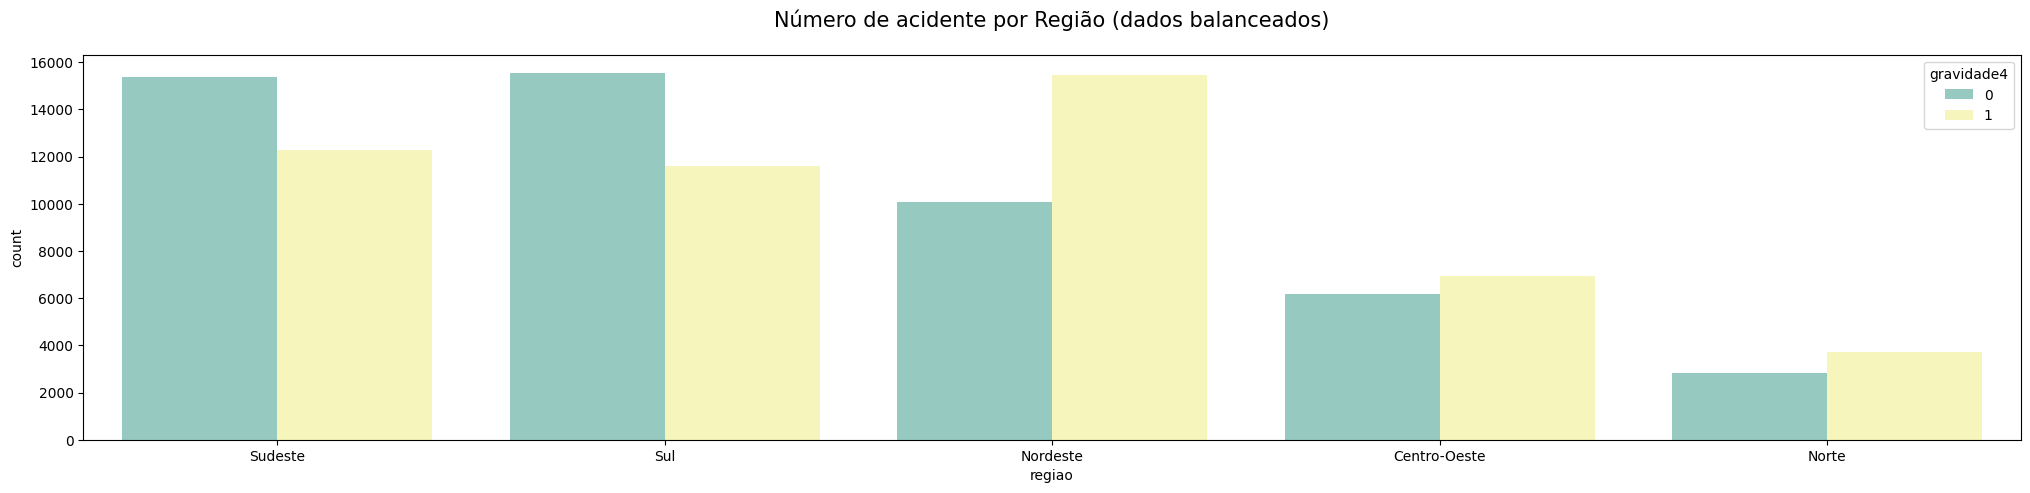

In [33]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='regiao', hue='gravidade4', 
                      data=df_prf_balanceado_ordenado ,palette="Set3", order=df_prf_balanceado_ordenado['regiao'].value_counts().index)
plt.title("Número de acidente por Região (dados balanceados)", size=15, y=1.05)
plt.show()

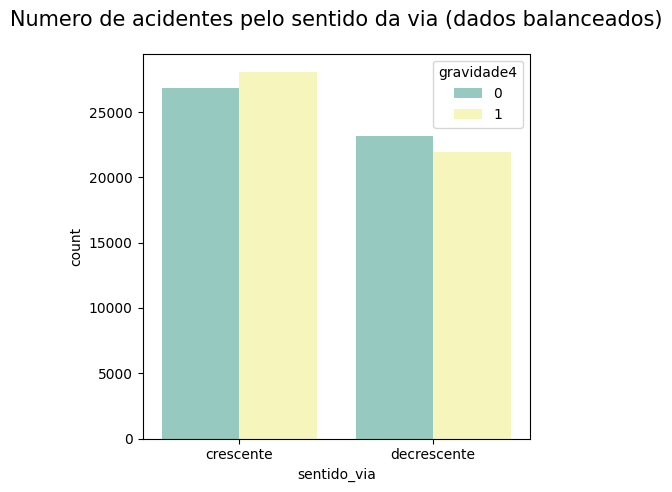

In [34]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x='sentido_via', hue='gravidade4', data=df_prf_balanceado_ordenado ,palette="Set3")
plt.title("Numero de acidentes pelo sentido da via (dados balanceados)", size=15, y=1.05)
plt.show()

In [35]:
# Filtrar os acidentes com gravidade4 igual a 1
df_filtrado_teste = df_prf_balanceado_ordenado[df_prf_balanceado_ordenado['gravidade4'] == 1]

# Contar o número de acidentes por Ano e Tipo de Acidente
contagem = df_filtrado_teste.groupby(['Ano', 'tipo_acidente']).size().reset_index(name='count')

# Exibir o resultado
print(contagem)


      Ano                    tipo_acidente  count
0    2017          atropelamento_de_animal    131
1    2017        atropelamento_de_pedestre     50
2    2017                      capotamento    392
3    2017  colisao_com_objeto_em_movimento     43
4    2017      colisao_com_objeto_estatico    451
..    ...                              ...    ...
108  2023                 eventos_atipicos     20
109  2023                         incendio      4
110  2023     queda_de_ocupante_de_veiculo    155
111  2023        saida_de_leito_carrocavel   1088
112  2023                       tombamento    448

[113 rows x 3 columns]


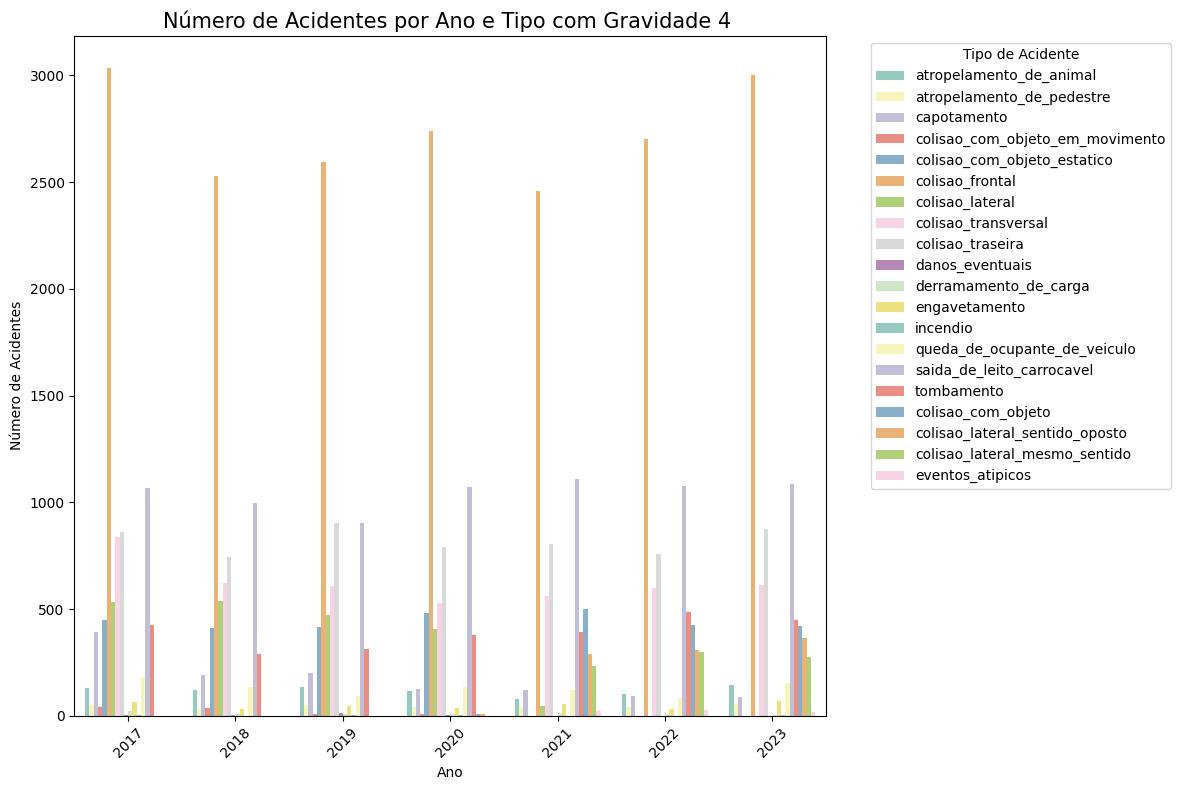

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

sns.barplot(data=contagem, x='Ano', y='count', hue='tipo_acidente', palette='Set3')

plt.gca().set_xlabel('Ano')
plt.gca().set_ylabel('Número de Acidentes')

plt.title('Número de Acidentes por Ano e Tipo com Gravidade 4 ', size=15)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Acidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


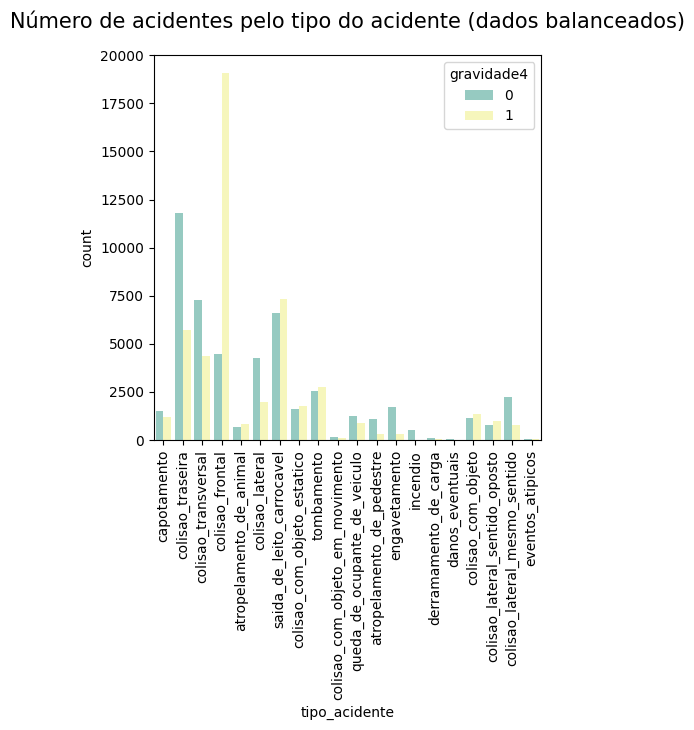

In [37]:
plt.figure(figsize=(5, 5))
chart = sns.countplot(x='tipo_acidente', hue='gravidade4', data=df_prf_balanceado_ordenado, palette="Set3")
plt.title("Número de acidentes pelo tipo do acidente (dados balanceados)", size=15, y=1.05)

plt.xticks(rotation=90)

plt.show()


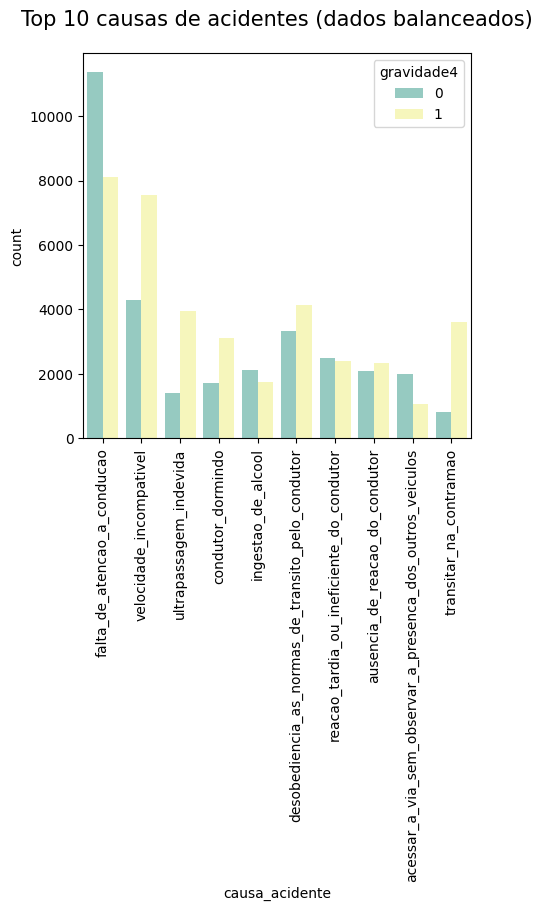

In [38]:
top_10_causas = df_prf_balanceado_ordenado['causa_acidente'].value_counts().head(10).index
df_top10_causas = df_prf_balanceado_ordenado[df_prf_balanceado_ordenado['causa_acidente'].isin(top_10_causas)]

plt.figure(figsize=(5, 5))
chart = sns.countplot(x='causa_acidente', hue='gravidade4', data=df_top10_causas, palette="Set3")
plt.title("Top 10 causas de acidentes (dados balanceados)", size=15, y=1.05)

plt.xticks(rotation=90)

plt.show()


In [39]:
def is_within_brazil(lat, lon):
    return -33.7422 <= lat <= 5.2718 and -73.989 <= lon <= -34.793

In [40]:
# transformação e filtro das coordenadas
df_prf['longitude'] = df_prf['longitude'].str.replace(",", ".").astype(float).round(6)
df_prf['latitude'] = df_prf['latitude'].str.replace(",", ".").astype(float).round(6)

# df_prf_coordenadas = df_prf[(df_prf['longitude'] >= -180) & (df_prf['longitude'] <= 180)]
df_prf_coordenadas = df_prf[df_prf.apply(lambda row: is_within_brazil(row['latitude'], row['longitude']), axis=1)]
df_prf = df_prf[df_prf.apply(lambda row: is_within_brazil(row['latitude'], row['longitude']), axis=1)]

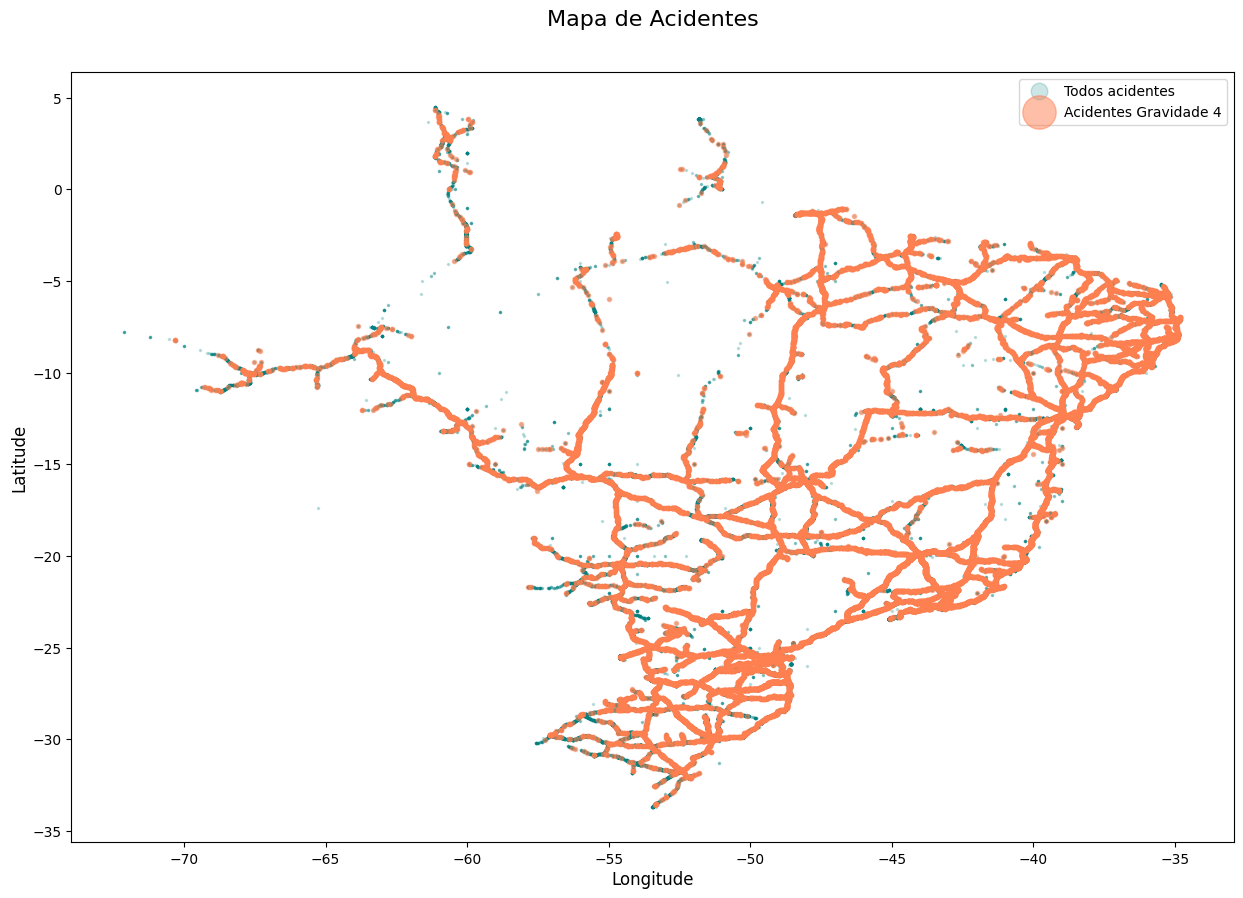

In [41]:
df_4 = df_prf_coordenadas[df_prf_coordenadas['gravidade4']==1]
df_normal = df_prf_coordenadas

plt.figure(figsize=(15,10))

plt.plot( 'longitude', 'latitude', data=df_normal, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='Todos acidentes')
plt.plot( 'longitude', 'latitude', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Acidentes Gravidade 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Mapa de Acidentes', size=16, y=1.05)
plt.show()

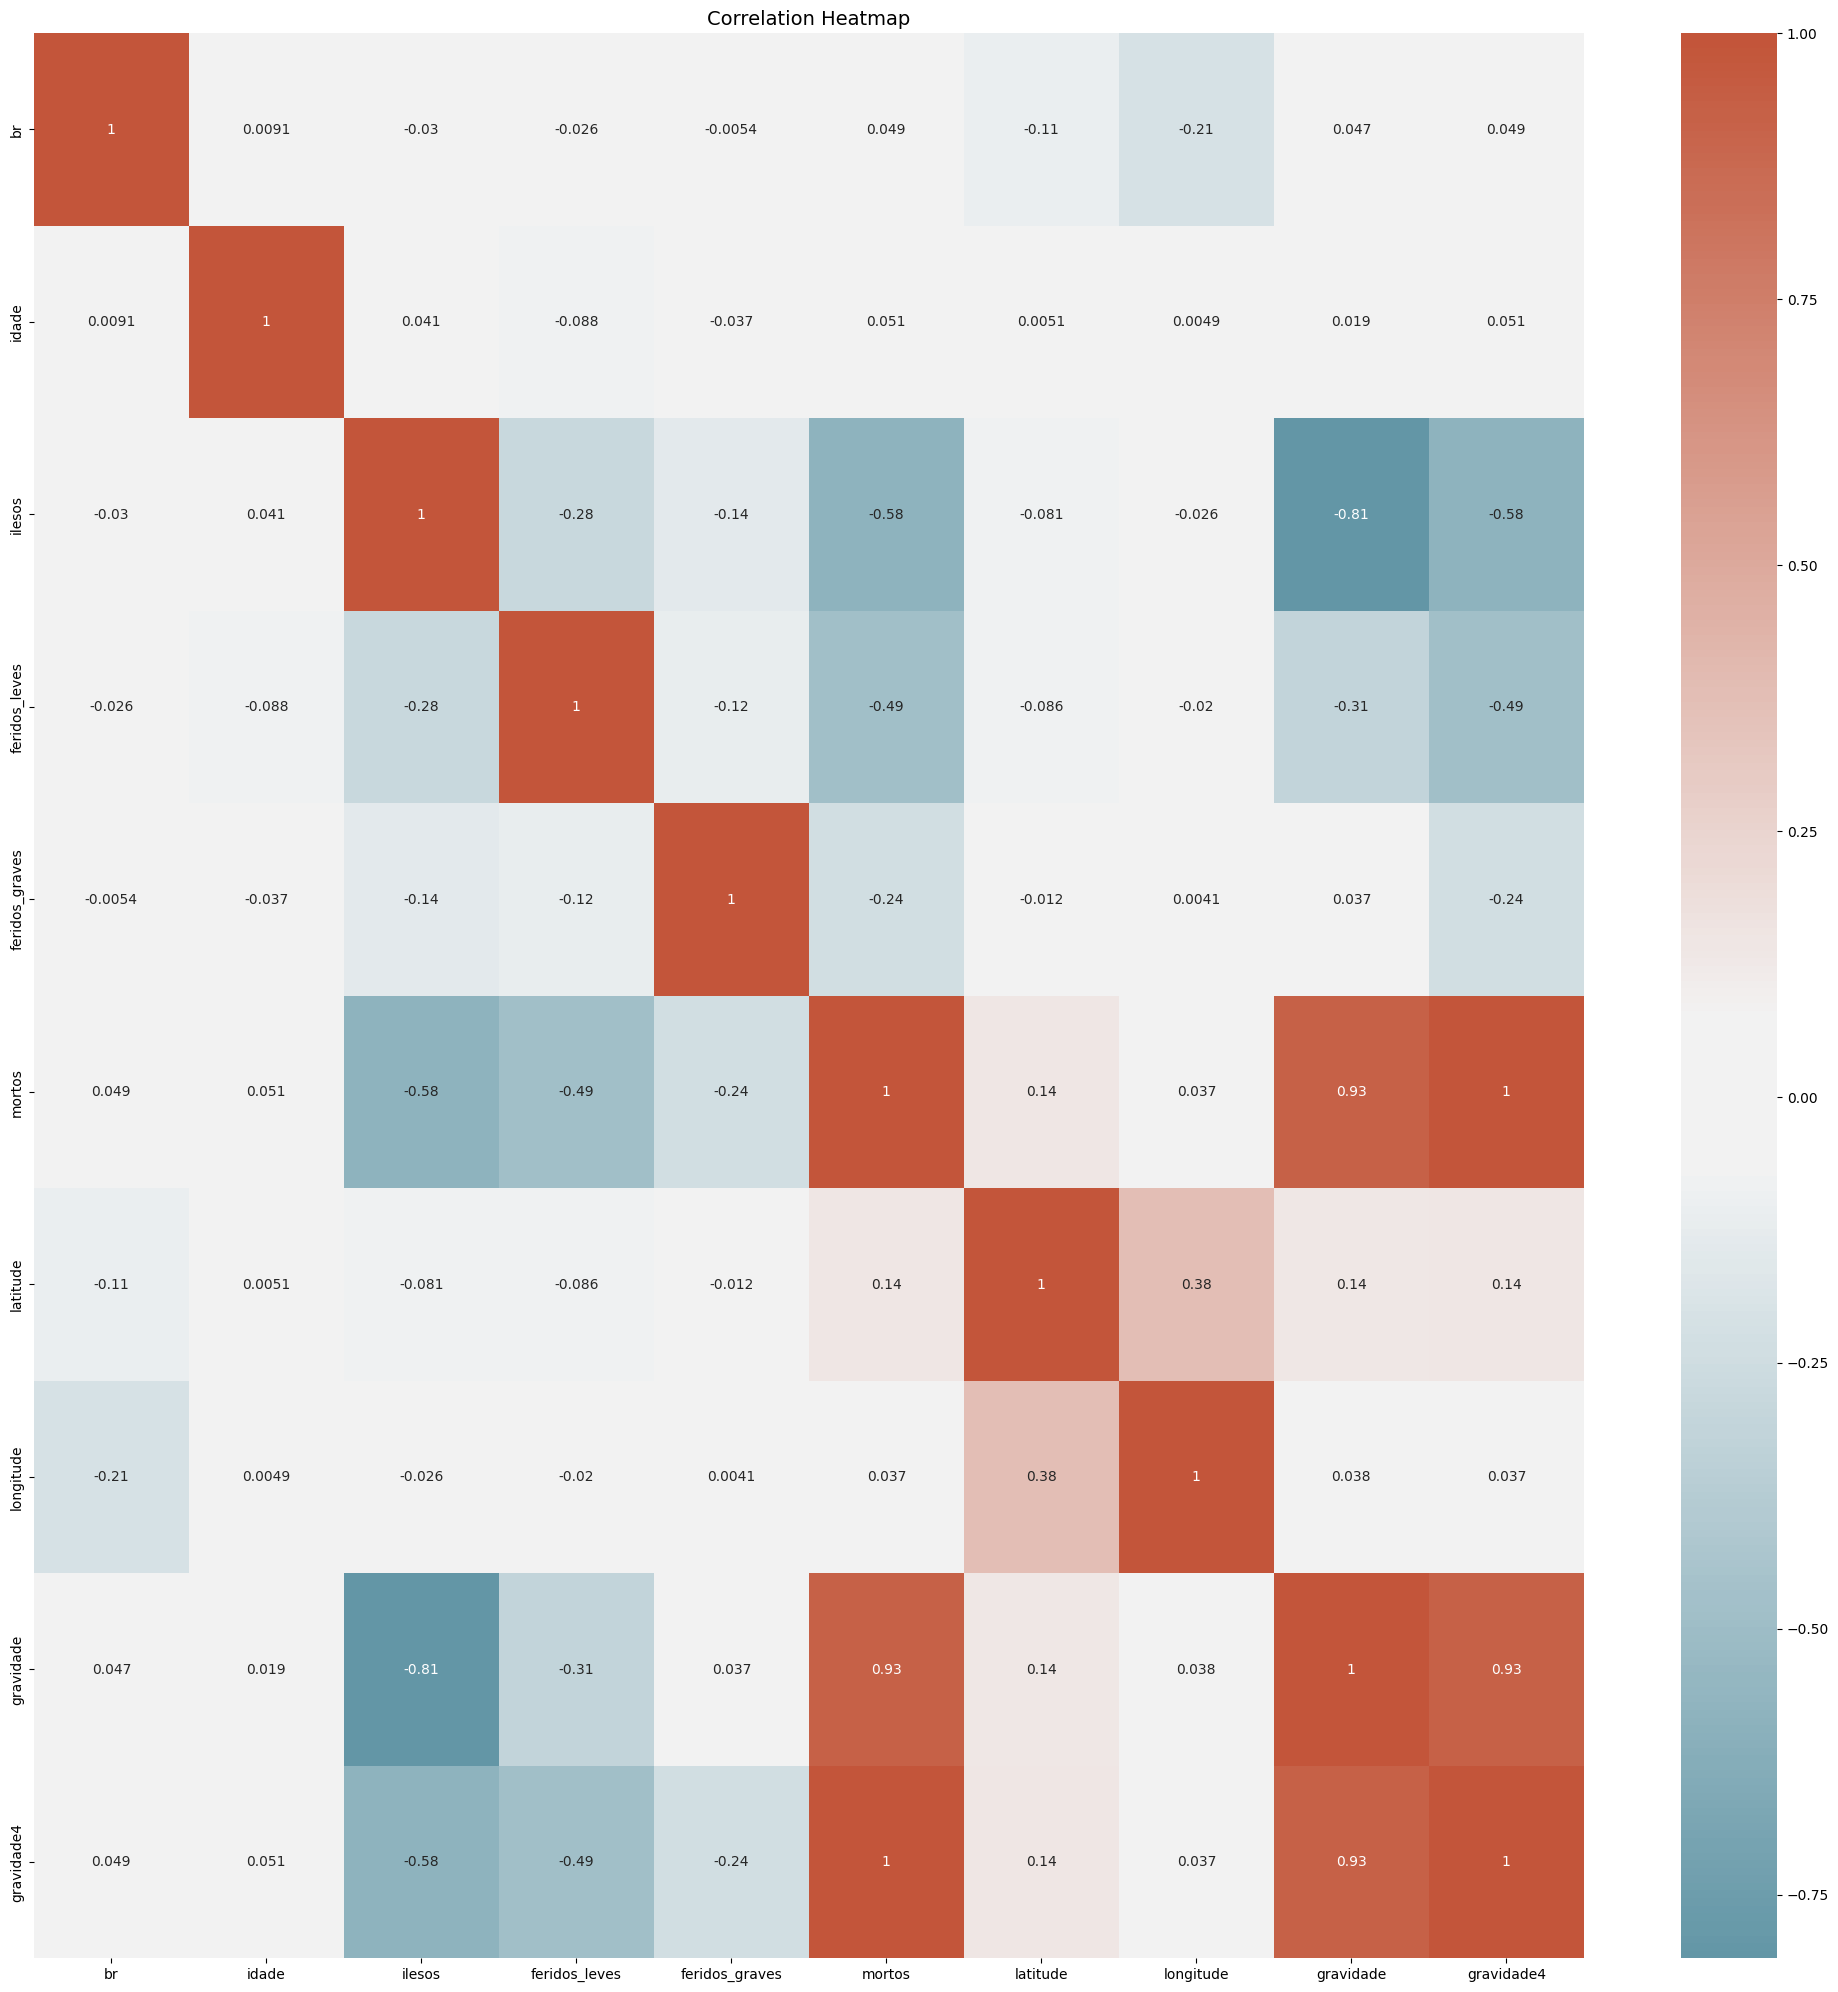

In [42]:
df_correlacao = resample(df_prf_coordenadas, 'gravidade4', 20000)

df_correlacao['gravidade4'] = df_correlacao['gravidade4'].astype(int)
df_numeric = df_correlacao.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_numeric.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

### One Hot Encoding

In [43]:
df_prf_one_hot = df_prf.copy()

# variáveis condição climática, anteriormente colocadas como booleanas, agora transformadas em variáveis binarias 0 | 1
df_prf_one_hot = df_prf_one_hot.replace([True, False], [1,0])

# variáveis categóricas para one-hot
col_categoricas = ["dia_semana", "uf", "sentido_via", "tipo_acidente", "tipo_pista", "uso_solo", "sexo", "fase_dia", "tracado_via", "tipo_veiculo"]

C:\Users\Rayron\AppData\Local\Temp\ipykernel_19584\3577875478.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_prf_one_hot = df_prf_one_hot.replace([True, False], [1,0])


In [44]:
df_prf_one_hot = df_prf_one_hot.drop(['mortos', 'feridos_graves', 'feridos_leves', 'ilesos'], axis=1)

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)

models_1hot = cat_encoder.fit_transform(df_prf_one_hot[col_categoricas]) # Aplicar o encoder nas colunas categóricas
encoded_cols = cat_encoder.get_feature_names_out(col_categoricas) # Verificar as colunas geradas pelo encoder

encoded_df = pd.DataFrame(models_1hot, columns=encoded_cols, index=df_prf_one_hot.index)

df_encoded = pd.concat([df_prf_one_hot.drop(columns=col_categoricas), encoded_df], axis=1)

df_encoded


,data_inversa,horario,br,km,municipio,causa_acidente,classificacao_acidente,id_veiculo,marca,ano_fabricacao_veiculo,...,tipo_veiculo_motor_casa,tipo_veiculo_onibus,tipo_veiculo_outros,tipo_veiculo_reboque,tipo_veiculo_semireboque,tipo_veiculo_trator_de_rodas,tipo_veiculo_trator_misto,tipo_veiculo_trem_bonde,tipo_veiculo_triciclo,tipo_veiculo_utilitario
487459,2017-01-01,01:45:00,116,"34,9",vacaria,defeito_mecanico_no_veiculo,com_vitimas_feridas,17,vw_17_280_crm_4x2_4p,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487460,2017-01-01,01:00:00,376,636,tijucas_do_sul,velocidade_incompativel,com_vitimas_fatais,1296,m_benz_atego_2430,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487461,2017-01-01,04:40:00,101,65,entre_rios,condutor_dormindo,com_vitimas_fatais,1659,scania_g_380_a4x2,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487462,2017-01-01,07:40:00,405,30,mossoro,ingestao_de_alcool,com_vitimas_fatais,108,scania_r_480_a6x4,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487463,2017-01-01,10:35:00,376,"249,5",apucarana,nao_guardar_distancia_de_seguranca,com_vitimas_feridas,97,ford_cargo_1723,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465338,2023-12-27,18:50:00,369,"158,6",londrina,ausencia_de_reacao_do_condutor,com_vitimas_feridas,1100556,honda_cbx_250_twister,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465339,2023-12-27,18:50:00,369,"158,6",londrina,ausencia_de_reacao_do_condutor,com_vitimas_feridas,1100556,honda_cbx_250_twister,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465340,2023-11-09,17:30:00,116,413,governador_valadares,pedestre_cruzava_a_pista_fora_da_faixa,com_vitimas_feridas,1100739,honda_cg_160_fan,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465341,2023-11-09,17:30:00,116,413,governador_valadares,pedestre_cruzava_a_pista_fora_da_faixa,com_vitimas_feridas,1100739,honda_cg_160_fan,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df_encoded.describe()

,br,id_veiculo,ano_fabricacao_veiculo,idade,latitude,longitude,gravidade,Céu Claro,Garoa/Chuvisco,Nublado,...,tipo_veiculo_motor_casa,tipo_veiculo_onibus,tipo_veiculo_outros,tipo_veiculo_reboque,tipo_veiculo_semireboque,tipo_veiculo_trator_de_rodas,tipo_veiculo_trator_misto,tipo_veiculo_trem_bonde,tipo_veiculo_triciclo,tipo_veiculo_utilitario
count,977778.000000,9.777780e+05,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,...,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000,977778.000000
mean,214.430369,5.088105e+05,2010.093779,38.342091,-19.000832,-46.781185,1.681092,0.590084,0.035288,0.167994,...,0.000170,0.034827,0.000026,0.000044,0.000250,0.000101,0.000005,0.000001,0.000100,0.013717
min,10.000000,4.000000e+00,1900.000000,1.000000,-33.706076,-72.119380,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,2.541982e+05,2007.000000,27.000000,-25.377871,-50.440977,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,163.000000,5.017130e+05,2011.000000,37.000000,-20.452663,-47.900453,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,343.000000,7.683738e+05,2015.000000,48.000000,-13.141386,-42.802288,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,498.000000,1.113328e+06,2023.000000,99.000000,4.476284,-34.793181,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,130.758404,2.964851e+05,7.743923,14.862960,7.719458,6.116523,0.780521,0.491818,0.184507,0.373861,...,0.013029,0.183341,0.005056,0.006631,0.015795,0.010062,0.002261,0.001011,0.010011,0.116313


## treino e teste

In [47]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [48]:
df_regressao_logistica = df_encoded.copy()

#df_regressao_logistica = df_regressao_logistica.drop(['data_inversa', 'horario', 'km', 'municipio', 'causa_acidente', 'classificacao_acidente', 'marca', 'condutor'], axis=1)

df_regressao_logistica = df_encoded.select_dtypes(include=['float64', 'int64'])


In [49]:
# split X, y
X = df_regressao_logistica.drop('gravidade4', axis=1)
y= df_regressao_logistica['gravidade4']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
model = LogisticRegression(max_iter=1000)  # Ajuste 'max_iter' para garantir a convergência
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [51]:
y_pred = model.predict(X_test)


In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


1.0


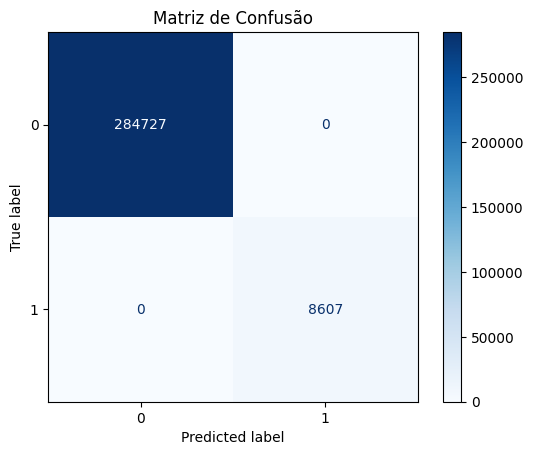

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

#Classe Negativa (Verdadeiro Negativo - VN)	VN	FP (Falso Positivo)
#Classe Positiva (Falso Negativo - FN)	FN	VP (Verdadeiro Positivo)

# Verdadeiros Positivos (VP): Casos corretamente classificados como positivos.
# Verdadeiros Negativos (VN): Casos corretamente classificados como negativos.
# Falsos Positivos (FP): Casos negativos classificados erroneamente como positivos (tipo I).
# Falsos Negativos (FN): Casos positivos classificados erroneamente como negativos (tipo II).


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284727
           1       1.00      1.00      1.00      8607

    accuracy                           1.00    293334
   macro avg       1.00      1.00      1.00    293334
weighted avg       1.00      1.00      1.00    293334



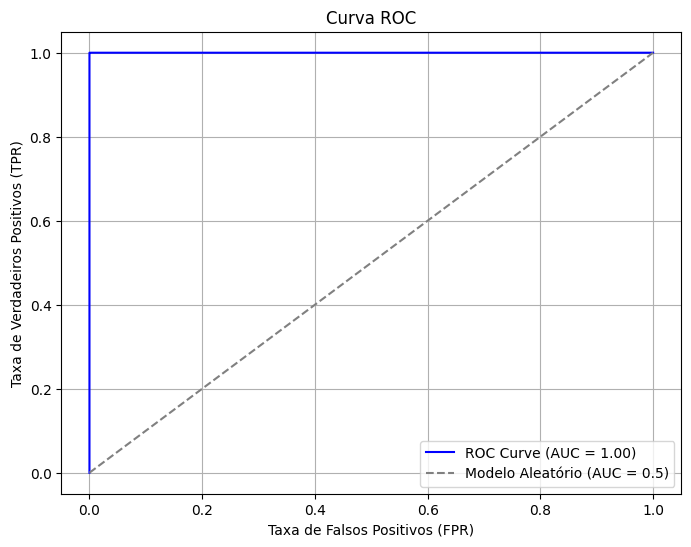

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obter as probabilidades previstas
y_prob = model.predict_proba(X_test)[:, 1]  # Pegue as probabilidades da classe positiva

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular o AUC
auc = roc_auc_score(y_test, y_prob)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Modelo Aleatório (AUC = 0.5)")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Interpretação do Gráfico
# Curva mais próxima do canto superior esquerdo:

# Indica um modelo com melhor capacidade de separação entre as classes.
# AUC próximo de 1:

# Significa que o modelo tem excelente desempenho.
# AUC próximo de 0.5:

# Indica que o modelo não tem poder discriminativo (equivalente ao chute aleatório).
# Avaliação prática:

# Se o AUC é alto, mas o modelo ainda comete muitos erros, verifique os dados (desbalanceamento, qualidade) ou ajuste o limiar de decisão.